# Project: Wrangling and Analyze Data

In [1]:
# Importing all required python libraries

import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline
from urllib import response
from IPython.display import display, Image

In [2]:
#Creating a folder for all project documents

folder_name='Udacity_Project_II'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#Reading Twitter-archive data into pandas dataframe

ds1=os.path.join(folder_name,'twitter-archive-enhanced.csv')
df_archive = pd.read_csv(ds1)
#df_archive.head()
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Accessing file programatically through the given url

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

ds2=os.path.join(folder_name, url.split('/')[-1])

#writing content of the url into folder 
with open(ds2, mode = 'wb') as file:
    file.write(response.content)
    
#reading data into pandas dataframe
df_image = pd.read_csv(ds2,sep='\t')
df_image.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

The tweet-json.txt file was used for this project owing to my inability to obtain the twitter developer account.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
ds3=os.path.join(folder_name,'tweet_json.txt')
df_tweet=pd.read_json(ds3,lines=True)
df_tweet.shape

(2354, 31)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

* For each data set, an indept assessment is carried out by visualising the data set in micrsoft excel.

* The basic data structure and desciptive statistical are also obtained programmically in python.

In [6]:
# Assessing twitter-archive-enhanced visually
df_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Assessing image-predictions data visually
df_image.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
# Assessing tweet_json data visually
df_tweet.head(50)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Programmatic Assessment

For each data set, the assessment is done by checking: 
* Data Structre Information
* duplicates
* Basic statistics

### Archive Data

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archive.duplicated().sum()

0

In [12]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [13]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Storkson      1
Toffee        1
Ronduh        1
Mo            1
Ole           1
Name: name, Length: 957, dtype: int64

In [14]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Image Prediction Data

In [18]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_image.duplicated().sum()

0

### Tweet Data

In [21]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
df_tweet.head(100)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-06-10 16:39:04+00:00,873580283840344065,873580283840344064,We usually don't rate Deck-bound Saskatoon Bla...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 873580279771926529, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,24837,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
96,2017-06-10 00:35:19+00:00,873337748698140672,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,NaN,NaN,NaN
97,2017-06-09 16:22:42+00:00,873213775632977920,873213775632977920,This is Sierra. She's one precious pupper. Abs...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 873213769794670593, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
98,2017-06-09 00:02:31+00:00,872967104147763200,872967104147763200,Here's a very large dog. He has a date later. ...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 872967099819462661, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28031,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [23]:
df_tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [24]:
df_tweet.lang.value_counts()

en     2336
und       7
in        3
nl        3
ro        1
eu        1
et        1
tl        1
es        1
Name: lang, dtype: int64

### Observation from Visual & Programmatic Assessment

### Quality issues
1. twitter-archive-enhanced - "timestamp", "retweeted_status_timestamp" has data type object which should be changed to datetime

2. twitter-archive-enhanced - rating_denominator column has invalid value (values > 10 and values <10)

3. twitter-archive-enhanced - "name" column has invalid dog names

4. twitter-archive-enhanced - doggo,floofer,pupper & puppo columns has Null represented as "None" which must be removed

5. twitter-archive-enhanced - data contains Retweets which must be removed

6. tweet_json - columns geo,coordinates and contributors are empty columns 

7. tweet_json - "lang" and "id" column name sholud be in full to prevent ambiguity

8. Both twitter-archive-enhanced & tweet_json have missing data for some columns  (This should be resolved last to prevet any valuable data loss)

### Tidiness issues
1. twitter-archive-enhanced - doggo,floofer,pupper & puppo indicating the growth stages of the dog should be represented as one colum

2. Both twitter-archive-enhanced & tweet_json contains columns  "in_reply_to_status_id", "in_reply_to_user_id" and "source"  and must be deleted from one data sets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original data sets
df_archive_cleaned = df_archive.copy()
df_image_cleaned = df_image.copy()
df_tweet_cleaned = df_tweet.copy()

### Quality issues

### Issue #1: 
twitter-archive-enhanced - "timestamp", "retweeted_status_timestamp" has data type object which should be changed to datetime

#### Define:
To change the datatype of the timestamp & retweeted_status_timestamp columns from object to datetime, the pandas to_datetime() method will be used.

#### Code

In [26]:
df_archive_cleaned['timestamp'] = pd.to_datetime(df_archive_cleaned['timestamp'])
df_archive_cleaned['retweeted_status_timestamp'] = pd.to_datetime(df_archive_cleaned['retweeted_status_timestamp'])

#### Test

In [27]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:
twitter-archive-enhanced - rating_denominator column has invalid value (values > 10 and values <10)

#### Define
From a very careful visual assessment, it can be observed that the rating is extracted from the text at the very first occurance of a divisor (/). For some instance however, the rating occurs on the second and not on the first. 
We will therefore identify and drop rows that do not fit the above conditions.

#### Code

In [28]:
# Identify the index of the rows to drop 
df_archive_cleaned[df_archive_cleaned['rating_denominator']!=10][['rating_denominator','text']]
#342 433 516 902 1120 1228 1254 1274 1351 1433 1598 1634 1635 1663 1779 1843

,rating_denominator,text
313,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
342,15,@docmisterio account started on 11/15/15
433,70,The floofs have been released I repeat the flo...
516,7,Meet Sam. She smiles 24/7 &amp; secretly aspir...
784,11,"RT @dog_rates: After so many requests, this is..."
902,150,Why does this never happen at my front door......
1068,11,"After so many requests, this is Bretagne. She ..."
1120,170,Say hello to this unbelievably well behaved sq...
1165,20,Happy 4/20 from the squad! 13/10 for all https...
1202,50,This is Bluebert. He just saw that both #Final...


#### Test

In [29]:
# Dropping identified rows
df_archive_cleaned.drop(index = [342,433,516,902,1120,1228,1254,1274,1351,1433,1598,1634,1635,1663,1779,1843], axis = 0, inplace = True)
df_archive_cleaned.reset_index(drop = True, inplace = True)

### Issue #3:
twitter-archive-enhanced - "name" column has invalid dog names

#### Define
It can be observed that invalid dog names are all spelt with lowercase.
Hence the islower() method will be used to eliminate all invalid dog names.

#### Code

In [30]:
#Creating a list of all names that are lower case
invalid_dog_names = list(df_archive_cleaned[df_archive_cleaned.name.str.islower()].name.unique())

#Replacing the names in the above list with NaN 
df_archive_cleaned['name']=df_archive_cleaned['name'].replace(invalid_dog_names, 'None')

#### Test

In [31]:
df_archive_cleaned.name.value_counts()

None        839
Charlie      12
Cooper       11
Lucy         11
Oliver       11
           ... 
Dug           1
Koko          1
Storkson      1
Major         1
Torque        1
Name: name, Length: 932, dtype: int64

### Issue #4:
twitter-archive-enhanced - doggo,floofer,pupper & puppo columns has Null represented as "None" which must be removed

#### Define
To remove all "None" values, the replace() method will be used.

#### Code

In [32]:

df_archive_cleaned['doggo']=df_archive_cleaned['doggo'].replace('None',np.nan)
df_archive_cleaned['floofer']=df_archive_cleaned['floofer'].replace('None',np.nan)
df_archive_cleaned['pupper']=df_archive_cleaned['pupper'].replace('None',np.nan)
df_archive_cleaned['puppo']=df_archive_cleaned['puppo'].replace('None',np.nan)

#### Test

In [33]:
df_archive_cleaned.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [34]:
df_archive_cleaned.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [35]:
df_archive_cleaned.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

In [36]:
df_archive_cleaned.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

### Issue #5:
twitter-archive-enhanced - data contains Retweets which must be removed

#### Define
Since all retweets have a retweet id, we will create a new dataframe containing all records without a retweet id.

#### Code

In [37]:
df_archive_cleaned = df_archive_cleaned[df_archive_cleaned['retweeted_status_user_id'].isnull()].reset_index(drop = True)

#### Test

In [38]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2159 non-null   int64              
 1   in_reply_to_status_id       74 non-null     float64            
 2   in_reply_to_user_id         74 non-null     float64            
 3   timestamp                   2159 non-null   datetime64[ns, UTC]
 4   source                      2159 non-null   object             
 5   text                        2159 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2104 non-null   object             
 10  rating_numerator            2159 non-null   int64           

### Issue #6:
tweet_json - columns geo,coordinates and contributors are empty columns

#### Define
columns geo,coordinates and contributors are empty columns and should be droped

#### Code

In [39]:
df_tweet_cleaned.drop(['geo', 'coordinates', 'contributors'], axis = 1, inplace = True)

#### Test

In [40]:
df_tweet_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #7:
tweet_json - "lang" and "id" column name sholud be in full

#### Define
lang, and id in the tweet_json data set should be in written full as language and tweet_id respectively

#### Code

In [41]:
df_tweet_cleaned.rename(columns = {'lang':'language','id':'tweet_id'}, inplace = True)

#### Test

In [42]:
df_tweet_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Tidiness issues

### Issue #1:
1. twitter-archive-enhanced - doggo,floofer,pupper & puppo indicating the growth stage of the dog should be represented as one colum

#### Define
the content of columns doggo,floofer,pupper & puppo will be merged together to form the column dog_stage

#### Code

In [43]:
# Merging Columns pupper,doggo,floofer,puppo
df_archive_cleaned['dog_stage'] = df_archive_cleaned.doggo.replace(np.nan,'') + df_archive_cleaned.floofer.replace(np.nan,'') + df_archive_cleaned.pupper.replace(np.nan,'')  + df_archive_cleaned.puppo.replace(np.nan,'')

#dropping columns pupper,doggo,floofer,puppo
df_archive_cleaned.drop(['doggo', 'floofer', 'pupper','puppo'], axis = 1, inplace = True)

#### Test

In [44]:
df_archive_cleaned.dog_stage.value_counts()

                1815
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [45]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2159 non-null   int64              
 1   in_reply_to_status_id       74 non-null     float64            
 2   in_reply_to_user_id         74 non-null     float64            
 3   timestamp                   2159 non-null   datetime64[ns, UTC]
 4   source                      2159 non-null   object             
 5   text                        2159 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2104 non-null   object             
 10  rating_numerator            2159 non-null   int64           

#### Code

In [46]:
#Introducing '|' delimiter where dog stage has 2 values 
df_archive_cleaned.dog_stage=df_archive_cleaned.dog_stage.replace('doggopupper','doggo|pupper')
df_archive_cleaned.dog_stage=df_archive_cleaned.dog_stage.replace('doggofloofer','doggo|floofer')
df_archive_cleaned.dog_stage=df_archive_cleaned.dog_stage.replace('doggopuppo','doggo|puppo')
df_archive_cleaned.dog_stage=df_archive_cleaned.dog_stage.replace('',np.nan)

#### Test

In [47]:
df_archive_cleaned.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo|pupper      10
floofer            9
doggo|floofer      1
doggo|puppo        1
Name: dog_stage, dtype: int64

### Issue #2:
Both twitter-archive-enhanced & tweet_json contains columns "in_reply_to_status_id", "in_reply_to_user_id" and "source" and must be deleted from one data set (twitter-archive-enhanced)

#### Define
Columns "in_reply_to_status_id", "in_reply_to_user_id" and "source" will deleted from the twitter-archive-enhanced data set

#### Code

In [48]:
df_archive_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], axis = 1, inplace = True)

#### Test

In [49]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2159 non-null   int64              
 1   timestamp                   2159 non-null   datetime64[ns, UTC]
 2   text                        2159 non-null   object             
 3   retweeted_status_id         0 non-null      float64            
 4   retweeted_status_user_id    0 non-null      float64            
 5   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 6   expanded_urls               2104 non-null   object             
 7   rating_numerator            2159 non-null   int64              
 8   rating_denominator          2159 non-null   int64              
 9   name                        2159 non-null   object             
 10  dog_stage                   344 non-null    object          

### Issue #8:
Both twitter-archive-enhanced & tweet_json have missing data for some columns

##### Define 
Evalute and drop columns with 50% values missing 

#### Code

In [50]:
# Creating a function that eveluates and drops columns with over 50% missing values
def DropCol(df):
    df = df.dropna(axis ='columns',thresh = int(len(df) * 0.5),  inplace = True)
    return df

In [51]:
# Applying the functions to the data sets
DropCol(df_archive_cleaned)
DropCol(df_tweet_cleaned)

#### Test

In [52]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2159 non-null   int64              
 1   timestamp           2159 non-null   datetime64[ns, UTC]
 2   text                2159 non-null   object             
 3   expanded_urls       2104 non-null   object             
 4   rating_numerator    2159 non-null   int64              
 5   rating_denominator  2159 non-null   int64              
 6   name                2159 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 118.2+ KB


In [53]:
df_tweet_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

In [54]:
df_image_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_twitter_archive_master = pd.merge(df_archive_cleaned, df_tweet_cleaned, how = 'left', on = ["tweet_id", "tweet_id"]).merge(df_image_cleaned, how = 'left', on = ["tweet_id", "tweet_id"]).reset_index(drop = True)
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2159 non-null   int64              
 1   timestamp                      2159 non-null   datetime64[ns, UTC]
 2   text                           2159 non-null   object             
 3   expanded_urls                  2104 non-null   object             
 4   rating_numerator               2159 non-null   int64              
 5   rating_denominator             2159 non-null   int64              
 6   name                           2159 non-null   object             
 7   created_at                     2159 non-null   datetime64[ns, UTC]
 8   id_str                         2159 non-null   int64              
 9   full_text                      2159 non-null   object             
 10  truncated               

In [56]:
df_twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,created_at,id_str,full_text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01 16:23:56+00:00,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01 00:17:27+00:00,892177421306343424,This is Tilly. She's just checking pup on you....,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [57]:
# Saving file to csv
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
# Top 5 dogs with the highest Numerator Rating
df_twitter_archive_master.groupby(['name','rating_numerator'])['rating_numerator'].max().sort_values(ascending = False).head(5)

name     rating_numerator
Atticus  1776                1776
None     960                  960
         666                  666
         420                  420
         182                  182
Name: rating_numerator, dtype: int64

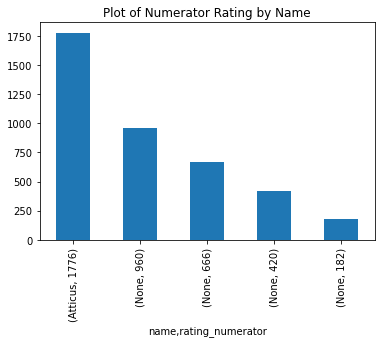

In [59]:
# Visual representaion of the top 5 dogs with the highest Numerator Rating
df_twitter_archive_master.groupby(['name','rating_numerator'])['rating_numerator'].max().sort_values(ascending = False).head(5).plot(kind = 'bar');
plt.title('Plot of Numerator Rating by Name');

In [60]:
# Top 5 dogs with the most "likes"
df_twitter_archive_master.groupby(['name','favorite_count'])['favorite_count'].max().sort_values(ascending = False).head(5)

name     favorite_count
None     132810            132810
         131075            131075
Duddles  107956            107956
Stephan  107015            107015
Jamesy   106827            106827
Name: favorite_count, dtype: int64

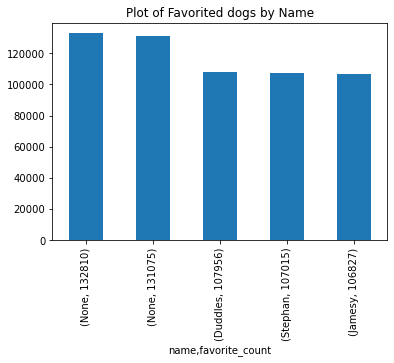

In [61]:
# Visual representaion of the top 5 dogs with the most "likes"
df_twitter_archive_master.groupby(['name','favorite_count'])['favorite_count'].max().sort_values(ascending = False).head(5).plot(kind = 'bar');
plt.title('Plot of Favorited dogs by Name');

In [62]:
# Top 5 dogs with most retweet counts
df_twitter_archive_master.groupby(['name','retweet_count'])['retweet_count'].max().sort_values(ascending = False).head(5)

name     retweet_count
None     79515            79515
Stephan  56625            56625
None     52360            52360
         48265            48265
Duddles  45849            45849
Name: retweet_count, dtype: int64

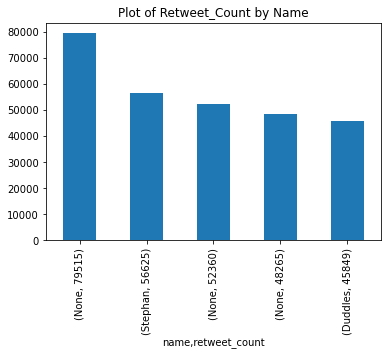

In [63]:
# Visusal representation of the top 5 dogs with most retweet counts
df_twitter_archive_master.groupby(['name','retweet_count'])['retweet_count'].max().sort_values(ascending = False).head(5).plot(kind = 'bar');
plt.title('Plot of Retweet_Count by Name');

### Insights:
1. Out of the top 5 most rated dogs, only Atticus is known by name, the names of the other 4 dogs are not provided.

2. Out of the top 5 most liked dogs,only 3 are known by names,Duddles, Stephan & Jamesy. Consequently, the names of the top 2 dogs are not provided.  

3. Out of the top 5 most retweeted dog post, only 2 are known by their names, Stephan and Duddles.  

### Visualization

In [64]:
# Retrieving the image URL of the most fovorite dog
df_twitter_archive_master[df_twitter_archive_master.favorite_count == 132810]['jpg_url']

347    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

Image of the dog with the most likes - Name Unknown


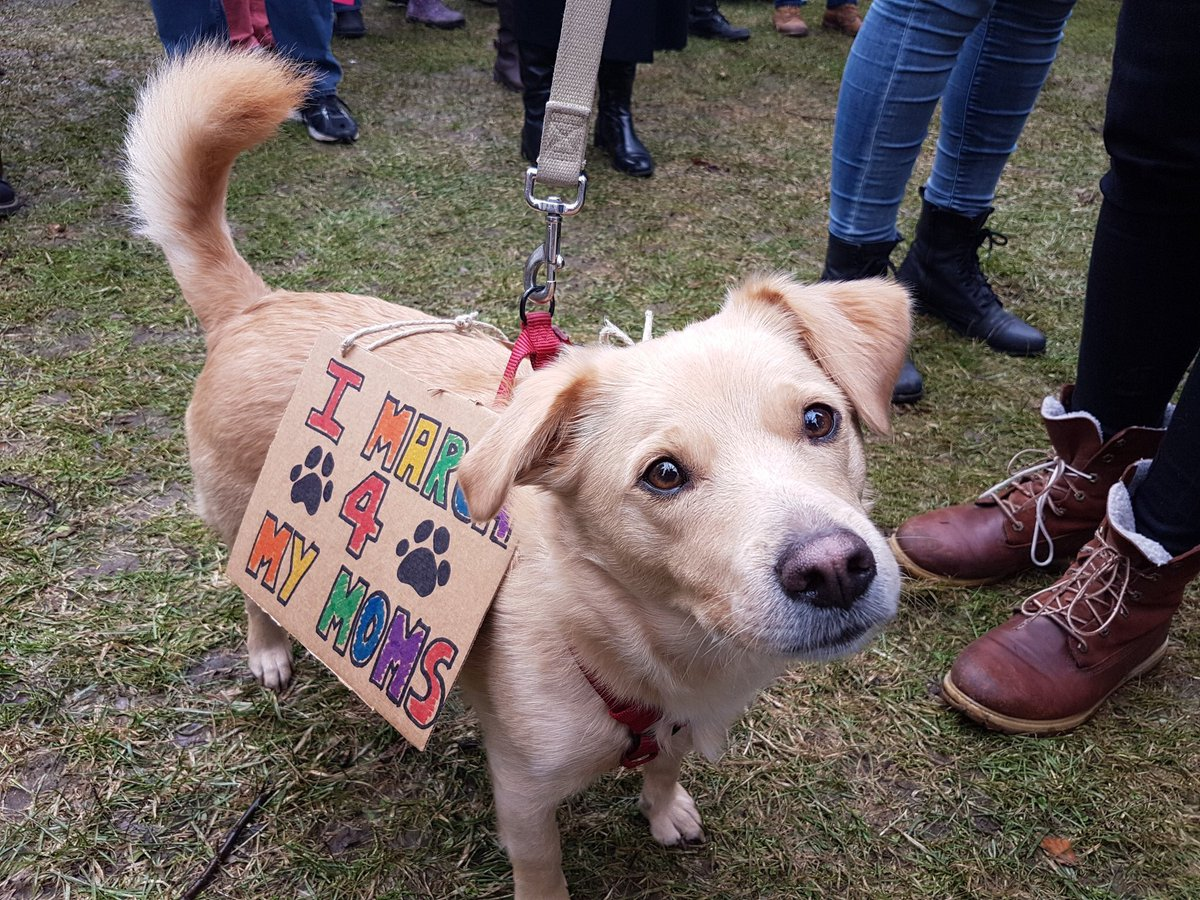

In [65]:
# Displaying the image of the dog with the most likes
print('Image of the dog with the most likes - Name Unknown')
display(Image(r'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'))

In [66]:
# Retrieving the image URL of the dog with the highest rating
df_twitter_archive_master[df_twitter_archive_master.rating_numerator == 1776]['jpg_url']

800    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

Image of the dog with the highest Numerator Rating - Atticus 


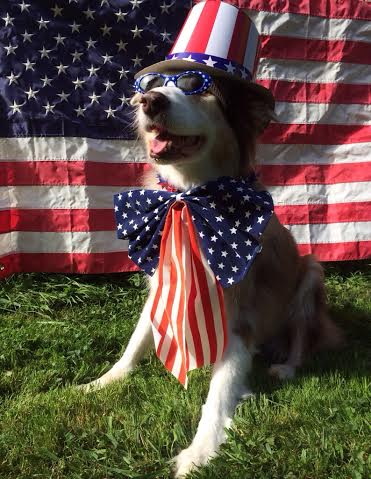

In [67]:
# Displaying the image of the dog with the highest rating
print('Image of the dog with the highest Numerator Rating - Atticus ')
display(Image(r'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'))

In [68]:
# Retrieving the image URL of the dog with the most retweets
df_twitter_archive_master[df_twitter_archive_master.retweet_count == 79515]['jpg_url']

858    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

Image of the dog with with the most retweets - Name Unknow


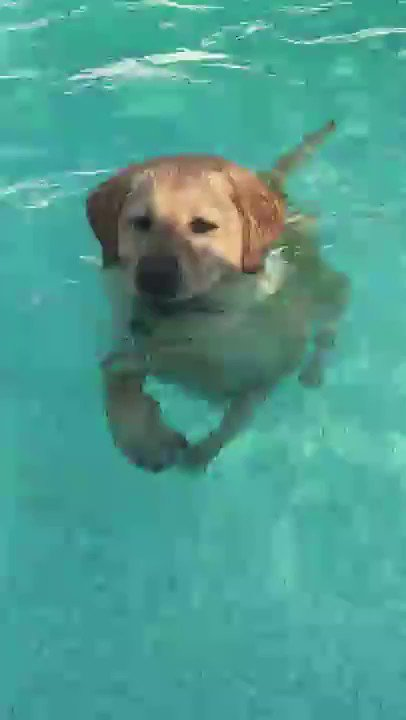

In [69]:
# Displaying the image of the dog with the most retweets
print('Image of the dog with with the most retweets - Name Unknow')
display(Image(r'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'))

Refrerence

https://sparkbyexamples.com/pandas/pandas-convert-json-to-dataframe/#:~:text=The%20json_normalize%20%28%29%20function%20is%20used%20to%20convert,to%20json_normalize%20%28%29%2C%20which%20returns%20a%20Pandas%20DataFrame

https://pandas.pydata.org/docs/user_guide/merging.html

https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values